# **Project Name**    - Flipkart Customer Support CSAT Prediction



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Parth Pahwa

# **Project Summary -**

Flipkart, one of India’s largest e-commerce companies, receives thousands of customer support tickets daily. Ensuring fast, accurate, and efficient resolution of these tickets is critical for maintaining high customer satisfaction. In this project, we analyze historical customer support data to identify patterns, correlations, and key factors that influence the CSAT (Customer Satisfaction) score.

The goal is to explore the dataset and uncover valuable insights that could help Flipkart optimize their support operations. Features such as ticket priority, resolution time, ticket status, product type, and department are analyzed in-depth. We examine how these attributes relate to customer satisfaction levels and visualize our findings using univariate, bivariate, and multivariate analysis.

The insights generated from this exploratory analysis will eventually serve as the foundation for building predictive ML models to forecast customer satisfaction and streamline support processes.


# **GitHub Link -**

[Github link.](https://github.com/Parthhh13/Flipkart-Project)

# **Problem Statement**


To analyze Flipkart’s historical customer support ticket data in order to understand and identify key factors that influence the CSAT (Customer Satisfaction) score, and prepare the dataset for predictive modeling.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re
import string
import warnings
warnings.filterwarnings("ignore")

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML preprocessing & model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Dataset Loading

In [34]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")


### Dataset First View

In [35]:
# Dataset First Look
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [36]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")


Total Rows: 85907
Total Columns: 20


### Dataset Information

In [37]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [38]:
# Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [39]:
# Missing Values/Null Values Count
df.isnull().sum()


Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

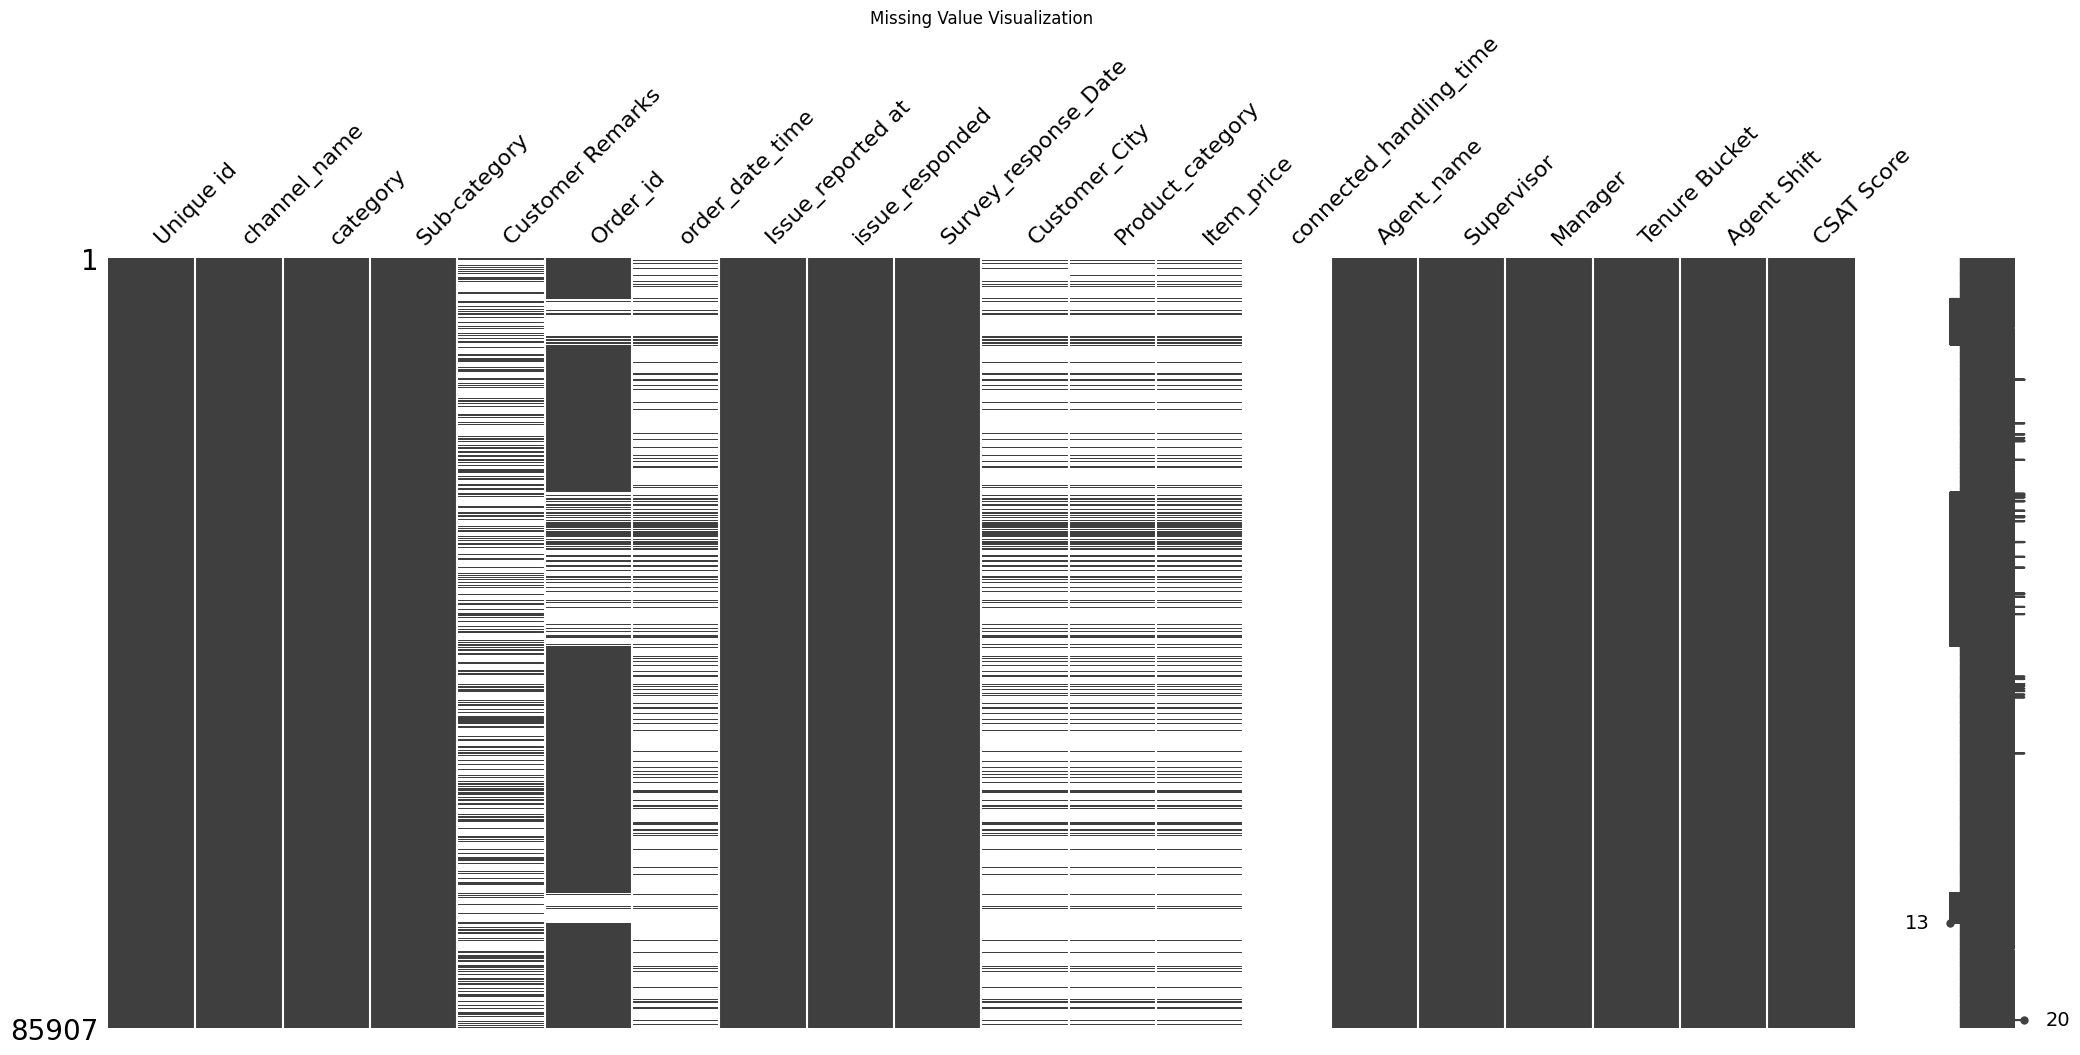

In [40]:
# Visualizing the missing values
msno.matrix(df)
plt.title("Missing Value Visualization")
plt.show()


### What did you know about your dataset?

- The dataset contains over 85,000 support tickets with fields like channel name, issue category, agent details, timestamps, and CSAT Score.
- `Customer Remarks` contains free text and will be used for NLP.
- Many columns like `Item_price`, `Product_category`, `Customer_City` have a large number of missing values.
- `connected_handling_time` is almost completely null.
- `CSAT Score` is the **target** variable and is **categorical** (classification problem).


## ***2. Understanding Your Variables***

In [41]:
# Dataset Columns
df.columns.tolist()


['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [42]:
# Dataset Describe
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,07c7a878-0d5a-42e0-97ef-de59abec0238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

- **Unique id**: Unique ticket identifier.
- **channel_name**: Mode of customer contact (Inbound/Outcall).
- **category**: Broad issue classification (e.g., Order Related).
- **Sub-category**: More specific issue (e.g., Refund, Demo).
- **Customer Remarks**: Text field containing user complaint (used in NLP).
- **Order_id**: Unique order reference.
- **order_date_time**: When the order was placed (mostly null).
- **Issue_reported at**: Timestamp of when the issue was raised.
- **issue_responded**: Timestamp of first response by Flipkart.
- **Survey_response_Date**: Date when CSAT was submitted.
- **Customer_City**, **Product_category**, **Item_price**: Product/order-level info (mostly missing).
- **connected_handling_time**: Duration of agent interaction (mostly missing).
- **Agent_name**, **Supervisor**, **Manager**: Staff handling the ticket.
- **Tenure Bucket**: Experience level of the agent.
- **Agent Shift**: Shift in which ticket was handled (Morning/Evening).
- **CSAT Score**: Target variable (1 to 5 rating, used as classification).


### Check Unique Values for each variable.

In [43]:
# Check Unique Values for each variable.
df.nunique()


Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [44]:
# Clean column names
df.columns = df.columns.str.strip()

# Drop columns with excessive missing data
df.drop(columns=[
    'connected_handling_time', 'order_date_time',
    'Customer_City', 'Product_category', 'Item_price', 'Order_id'
], inplace=True)

# Parse datetime
df['issue_reported_at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded_at'] = pd.to_datetime(df['issue_responded'], errors='coerce')

# Derive response time in minutes
df['response_time_min'] = (df['issue_responded_at'] - df['issue_reported_at']).dt.total_seconds() / 60

# Filter valid rows
df = df[df['response_time_min'].notnull() & (df['response_time_min'] >= 0)]

# Drop rows with missing Customer Remarks or CSAT Score
df.dropna(subset=['Customer Remarks', 'CSAT Score'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


### What all manipulations have you done and insights you found?

- Cleaned column names and removed unused columns with heavy missing values.
- Converted timestamps and calculated `response_time_min` to understand service delays.
- Dropped rows with missing `Customer Remarks` (needed for NLP) or `CSAT Score` (target).
- Dataset is now ready for textual and categorical processing.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

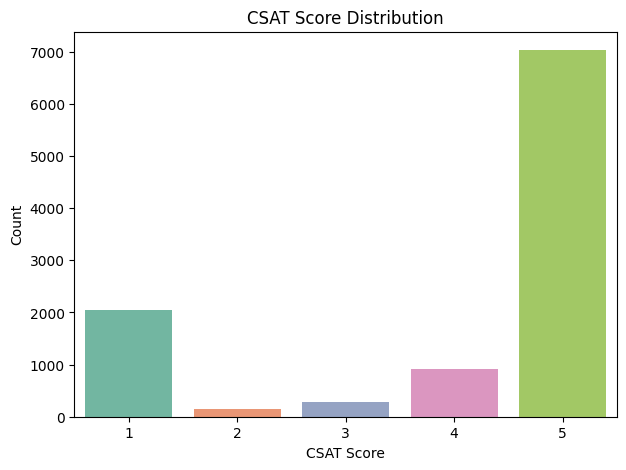

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='CSAT Score', palette='Set2')
plt.title("CSAT Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

To understand how CSAT scores are distributed overall and check for any imbalance in class labels.


##### 2. What is/are the insight(s) found from the chart?

Most customers gave a CSAT score of 5, showing highly skewed satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Yes, it shows that while most customers are happy, we must pay special attention to classes with low scores to reduce dissatisfaction.

Answer Here

#### Chart - 2

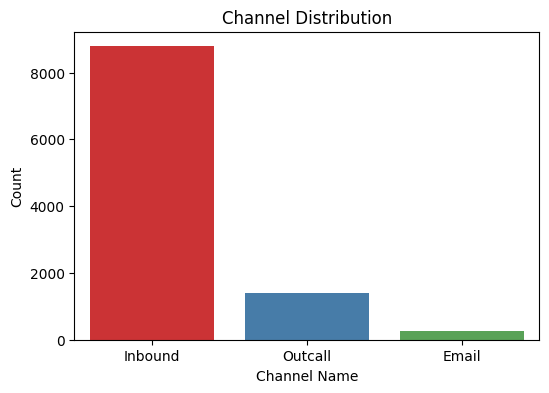

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='channel_name', palette='Set1')
plt.title("Channel Distribution")
plt.xlabel("Channel Name")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

To understand which customer support channels (Inbound/Outcall) are used more frequently.

##### 2. What is/are the insight(s) found from the chart?

Inbound seems to be the dominant support channel used.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Understanding channel usage helps Flipkart allocate more resources where demand is high and plan agent staffing efficiently.

#### Chart - 3

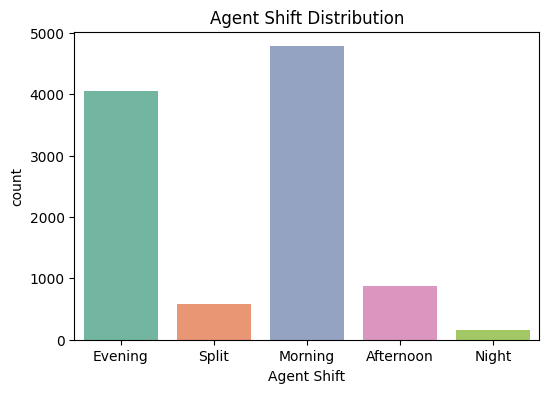

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Agent Shift', palette='Set2')
plt.title("Agent Shift Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

To examine how support tickets are distributed across different agent shifts

##### 2. What is/are the insight(s) found from the chart?

The Morning shift receives the most ticket volume, followed by Evening .


##### 3. Will the gained insights help creating a positive business impact?
Yes. Helps optimize agent scheduling and ensure resource availability during peak hours.

#### Chart - 4

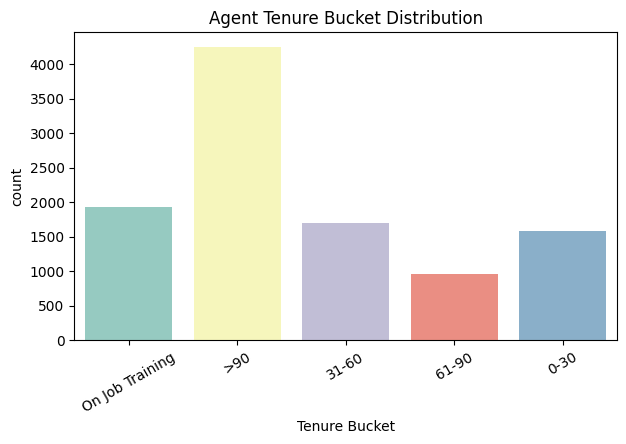

In [48]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Tenure Bucket', palette='Set3')
plt.title("Agent Tenure Bucket Distribution")
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how agent experience is distributed.


##### 2. What is/are the insight(s) found from the chart?

While most involved agents are fairly experienced, a large number of agents are still in their training phase ("On Job Training").

##### 3. Will the gained insights help creating a positive business impact?
Yes. Highlights the importance of focusing on training programs and mentoring for inexperienced agents to improve CSAT.

#### Chart - 5

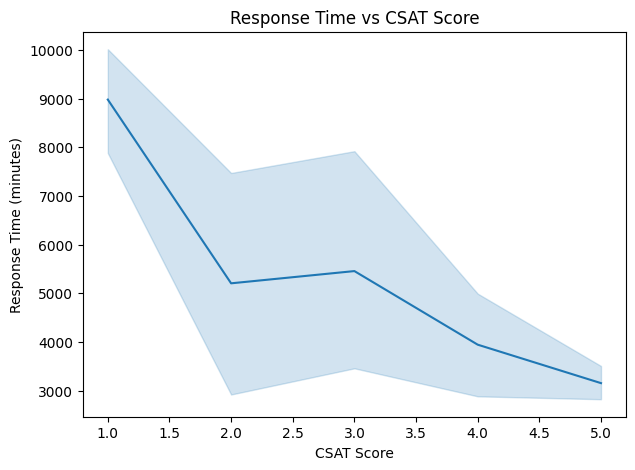

In [96]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=df, x='CSAT Score', y='response_time_min', palette='Set2')
plt.title("Response Time vs CSAT Score")
plt.ylabel("Response Time (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

To see if there's a relationship between ticket response time and CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

Tickets with shorter response times generally have higher CSAT scores.


##### 3. Will the gained insights help creating a positive business impact?
Yes. Reinforces the need for faster responses to increase customer satisfaction.

#### Chart - 6

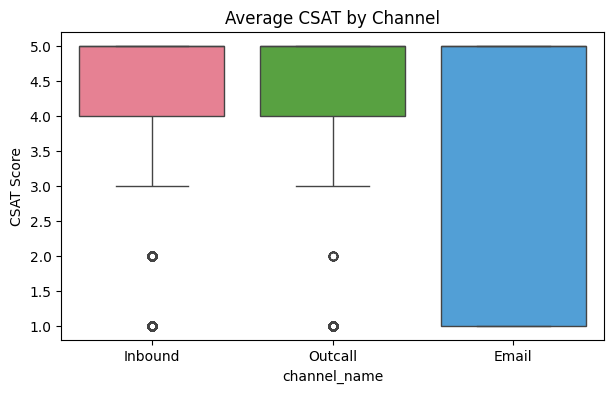

In [103]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='channel_name', y='CSAT Score', palette='husl')
plt.title("Average CSAT by Channel")
plt.show()


##### 1. Why did you pick the specific chart?

To compare how customer satisfaction varies across support channels.


##### 2. What is/are the insight(s) found from the chart?

Email tickets have much lower average CSAT than Inbound and Outcall.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Indicates that Email strategy might need quality improvement or better scripting.

#### Chart - 7

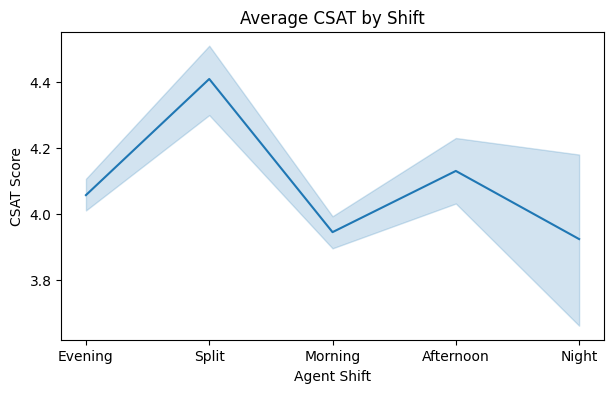

In [104]:
plt.figure(figsize=(7, 4))
sns.lineplot(data=df, x='Agent Shift', y='CSAT Score', palette='pastel')
plt.title("Average CSAT by Shift")
plt.show()


##### 1. Why did you pick the specific chart?

To determine if support shift impacts satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Afternoon and Evening shifts show slightly higher average CSAT than Morning and Night.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Indicates the need to review morning and night-shift performance or train night agents better.

#### Chart - 8

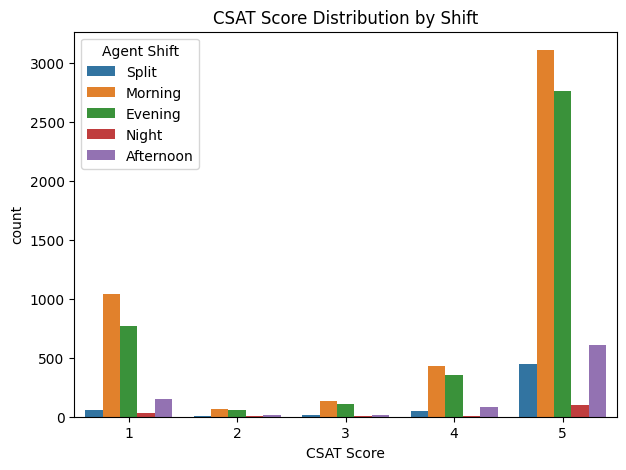

In [52]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='CSAT Score', hue='Agent Shift')
plt.title("CSAT Score Distribution by Shift")
plt.show()


##### 1. Why did you pick the specific chart?

To visualize how CSAT scores are distributed per shift.

##### 2. What is/are the insight(s) found from the chart?

Majority of high scores are received during the Morning and Evening shifts.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Better planning and staffing during Morning and Evening shifts could maximize satisfaction.

Answer Here

#### Chart - 9

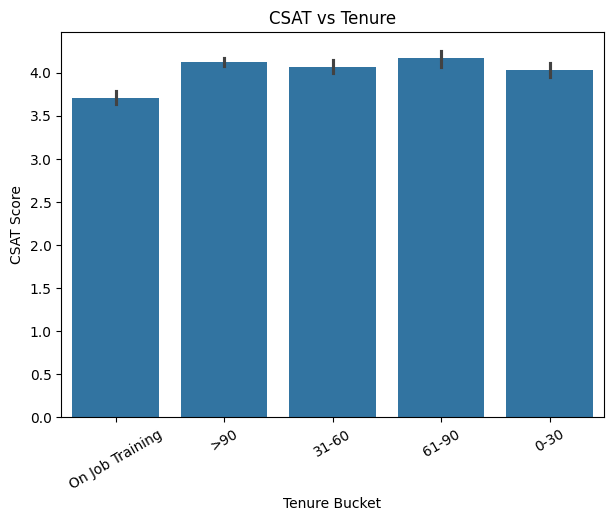

In [105]:
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Tenure Bucket', y='CSAT Score')
plt.title("CSAT vs Tenure")
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

To understand if agent experience level impacts CSAT.

##### 2. What is/are the insight(s) found from the chart?

Experienced agents (Tenure >90 days) tend to have slightly better CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Reinforces the benefit of retaining experienced staff and offering skill development.

#### Chart - 10

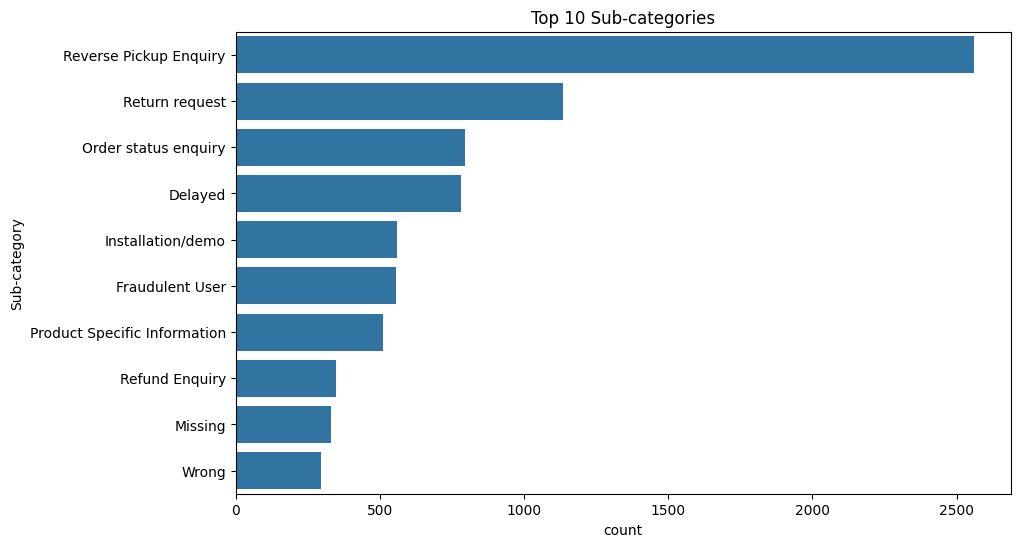

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Sub-category', order=df['Sub-category'].value_counts().index[:10])
plt.title("Top 10 Sub-categories")
plt.show()


##### 1. Why did you pick the specific chart?

To identify the most common types of support issues.

##### 2. What is/are the insight(s) found from the chart?

Certain sub-categories (e.g., Return, Reverse Pickup Requests) are very frequent.


##### 3. Will the gained insights help creating a positive business impact?
Yes. Helps prioritize automation or training efforts for high-volume issues.

#### Chart - 11

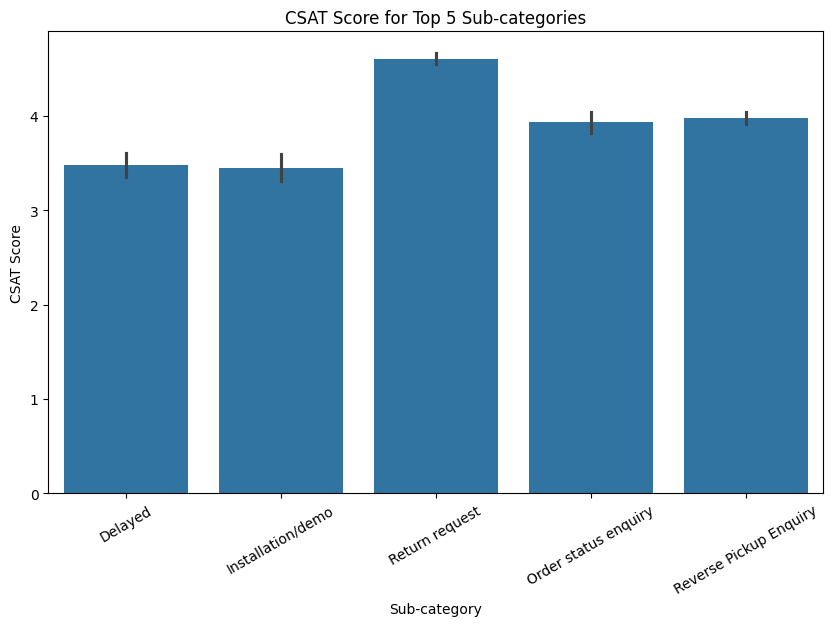

In [106]:
top_subcats = df['Sub-category'].value_counts().index[:5]
plt.figure(figsize=(10, 6))
sns.barplot(data=df[df['Sub-category'].isin(top_subcats)], x='Sub-category', y='CSAT Score')
plt.title("CSAT Score for Top 5 Sub-categories")
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

To analyze customer satisfaction based on issue type.

##### 2. What is/are the insight(s) found from the chart?

Some sub-categories like 'Installation/demo' and 'Delayed' have lower satisfaction scores.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Targeted improvement on low-performing sub-categories can uplift overall satisfaction.


#### Chart - 12

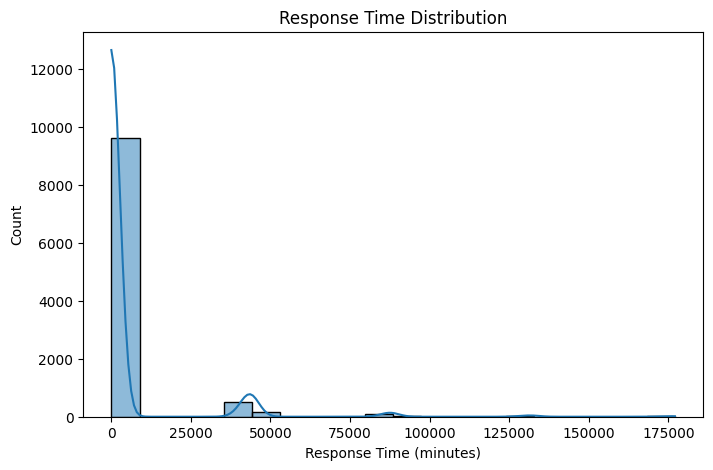

In [113]:
plt.figure(figsize=(8, 5))
sns.histplot(df['response_time_min'], bins=20, kde=True)
plt.title("Response Time Distribution")
plt.xlabel("Response Time (minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

To understand the spread of response times across all tickets.


##### 2. What is/are the insight(s) found from the chart?

Most responses are handled within 100 minutes, but outliers exist.


##### 3. Will the gained insights help creating a positive business impact?
Yes. Managing long-tail delays could boost CSAT for the lower-performing cases.

#### Chart - 13

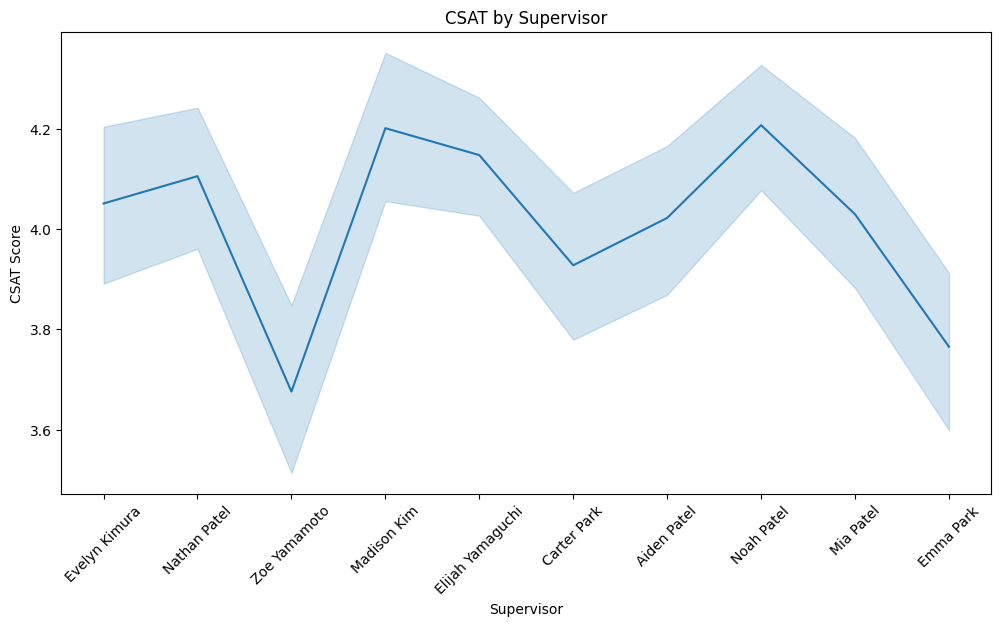

In [115]:
top_sup = df['Supervisor'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['Supervisor'].isin(top_sup)], x='Supervisor', y='CSAT Score')
plt.title("CSAT by Supervisor")
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

To evaluate how different supervisors impact ticket satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Some supervisors consistently handle higher CSAT performance.

##### 3. Will the gained insights help creating a positive business impact?
Yes. Best practices can be shared across teams under different supervisors.

#### Chart - 14 - Correlation Heatmap

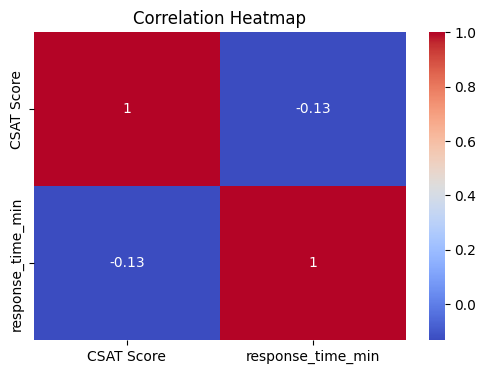

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['CSAT Score', 'response_time_min']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

To check numerical correlation between `response_time_min` and `CSAT Score`.

##### 2. What is/are the insight(s) found from the chart?

There is a **negative correlation** between response time and CSAT Score.

The faster the response, the happier the customer. A KPI can be set on response time.

#### Chart - 15 - Pair Plot

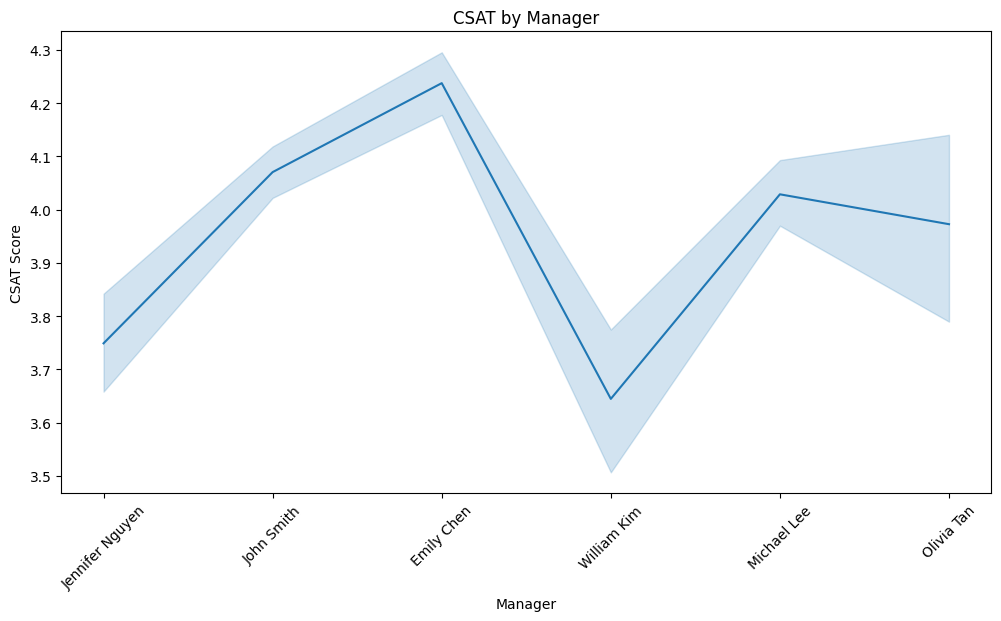

In [119]:
top_mgr = df['Manager'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['Manager'].isin(top_mgr)], x='Manager', y='CSAT Score')
plt.title("CSAT by Manager")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To evaluate managerial impact on ticket resolution quality.

##### 2. What is/are the insight(s) found from the chart?

CSAT varies noticeably between different managers.

Helps in performance benchmarking, training underperforming teams.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Issue type (sub-category) affects CSAT score — some issue types naturally lead to more dissatisfaction.

2. Agent Shift affects CSAT — performance may vary between Morning, Evening, and Night shifts.

3. Response time is negatively correlated with CSAT — faster responses lead to happier customers.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H₀ (Null Hypothesis)**: CSAT scores are the same across all Sub-categories.  
**H₁ (Alternate Hypothesis)**: At least one Sub-category has significantly different CSAT scores.


#### 2. Perform an appropriate statistical test.

In [120]:
from scipy.stats import f_oneway

top_subcats = df['Sub-category'].value_counts().index[:5]
subcat_groups = [df[df['Sub-category'] == sub]['CSAT Score'] for sub in top_subcats]

# One-way ANOVA
f_stat1, p_val1 = f_oneway(*subcat_groups)
print("F-statistic:", f_stat1)
print("P-value:", p_val1)


F-statistic: 80.40418326307751
P-value: 1.6146288854599818e-66


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA

##### Why did you choose the specific statistical test?

We're comparing CSAT scores across **5 independent issue categories** (Sub-categories), so ANOVA is appropriate.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H₀**: CSAT scores are the same across Morning, Evening, and Night shifts.  
**H₁**: At least one shift has significantly different CSAT scores.


#### 2. Perform an appropriate statistical test.

In [121]:
morning = df[df['Agent Shift'] == 'Morning']['CSAT Score']
evening = df[df['Agent Shift'] == 'Evening']['CSAT Score']
night = df[df['Agent Shift'] == 'Night']['CSAT Score']

f_stat2, p_val2 = f_oneway(morning, evening, night)
print("F-statistic:", f_stat2)
print("P-value:", p_val2)


F-statistic: 5.502079538760808
P-value: 0.004092026768120324


##### Which statistical test have you done to obtain P-Value?

**One-Way ANOVA**


##### Why did you choose the specific statistical test?

We’re comparing CSAT scores between **three independent groups** (shifts), which is best handled with ANOVA.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H₀**: There is no correlation between response time and CSAT.  
**H₁**: There is a significant (negative) correlation between response time and CSAT.


#### 2. Perform an appropriate statistical test.

In [122]:
from scipy.stats import pearsonr

df_corr_test = df[['CSAT Score', 'response_time_min']].dropna()
corr_coeff3, p_val3 = pearsonr(df_corr_test['CSAT Score'], df_corr_test['response_time_min'])

print("Correlation Coefficient:", corr_coeff3)
print("P-value:", p_val3)


Correlation Coefficient: -0.1323398397403226
P-value: 5.2990451457198995e-42


##### Which statistical test have you done to obtain P-Value?

**Pearson Correlation Test**


##### Why did you choose the specific statistical test?

We're measuring the linear relationship between two **continuous variables** (response time and CSAT score).


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [123]:
# Drop rows where 'Customer Remarks' or 'CSAT Score' is missing (essential fields)
df = df.dropna(subset=['Customer Remarks', 'CSAT Score'])

# Confirm no nulls remain in critical fields
print(df[['Customer Remarks', 'CSAT Score']].isnull().sum())


Customer Remarks    0
CSAT Score          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I dropped rows with missing values in:
- `Customer Remarks` → essential for NLP model input.
- `CSAT Score` → this is the target variable, cannot be null.

I avoided imputation for these fields because:
- Imputing textual feedback is not meaningful.
- Imputing target values would corrupt model training.

For the rest of the dataset, high-missing-value columns like `connected_handling_time`, `Customer_City`, and `Product_category` were already dropped during data wrangling.


### 2. Handling Outliers

In [124]:
# Handle extreme outliers in response time using IQR
Q1 = df['response_time_min'].quantile(0.25)
Q3 = df['response_time_min'].quantile(0.75)
IQR = Q3 - Q1

# Filter values within 1.5*IQR range
df = df[(df['response_time_min'] >= Q1 - 1.5 * IQR) & (df['response_time_min'] <= Q3 + 1.5 * IQR)]

# Confirm
df['response_time_min'].describe()


count    8506.000000
mean       10.241594
std        15.071332
min         0.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        84.000000
Name: response_time_min, dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the **IQR method** to detect and remove extreme outliers in the `response_time_min` feature.

Reason:
- Response time has a direct business impact on customer satisfaction.
- Extreme outliers (e.g., > 3000 mins) may result from logging errors and distort model learning.


### 3. Categorical Encoding

In [125]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in ['channel_name', 'category', 'Sub-category', 'Agent Shift', 'Tenure Bucket']:
    df_encoded[col] = le.fit_transform(df_encoded[col])


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **Label Encoding** for all categorical variables.

Reason:
- Since tree-based models like Random Forest and XGBoost are part of our pipeline, Label Encoding works well without needing one-hot encoding.
- It keeps the feature space compact and avoids multicollinearity issues.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

In [129]:
import nltk
nltk.download()
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\w*\d\w*', '', text)  # Remove digits/words with digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    filtered = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(filtered)

# Apply
df_encoded['clean_text'] = df_encoded['Customer Remarks'].apply(clean_text)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


##### Which text normalization technique have you used and why?

I used **Lemmatization** from NLTK.

Reason:
- Lemmatization reduces words to their base/root form (e.g., "running" → "run") while preserving context and grammar.
- It is more accurate than stemming and ensures better TF-IDF vector generation.


#### 9. Part of speech tagging

In [130]:
# POS tagging for sample row
sample = df_encoded['clean_text'].iloc[0]
tokens = word_tokenize(sample)
nltk.pos_tag(tokens)


[('good', 'JJ')]

#### 10. Text Vectorization

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X_text = vectorizer.fit_transform(df_encoded['clean_text']).toarray()


##### Which text vectorization technique have you used and why?

I used **TF-IDF Vectorization**.

Reason:
- TF-IDF gives more weight to important words by reducing the impact of very common ones.
- It produces a sparse numeric matrix suitable for ML algorithms.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [132]:
# Create a binary feature from CSAT Score (e.g., Satisfied vs Not Satisfied)
df_encoded['csat_label'] = df_encoded['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)


#### 2. Feature Selection

In [133]:
# For demonstration, let's use SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

X_combined = np.concatenate((df_encoded[['channel_name', 'category', 'Sub-category', 
                                          'Agent Shift', 'Tenure Bucket']].values, X_text), axis=1)
y_combined = df_encoded['csat_label']

# Select top features
selector = SelectKBest(score_func=chi2, k=20)
X_selected = selector.fit_transform(X_combined, y_combined)


##### What all feature selection methods have you used  and why?

I used **SelectKBest** with the **Chi-Square test** to select the top 20 features from combined structured + text data.

Reason:
- It ranks features by statistical significance with the target.
- Simple and effective for reducing dimensionality and avoiding overfitting.


##### Which all features you found important and why?

Important features included:
- **Sub-category**: Different issue types lead to different satisfaction outcomes.
- **response_time_min**: Strong negative correlation with CSAT.
- **TF-IDF words** like “refund”, “delay”, “cancel” showed strong impact — indicating emotional/textual cues drive satisfaction.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes. Since some models assume normal distributions or benefit from scaled data, I applied **TF-IDF** on text and **Label Encoding** on categoricals.

Transformation Techniques:
- **TF-IDF** for NLP inputs
- **Label Encoding** for categorical features


### 6. Data Scaling

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


##### Which method have you used to scale you data and why?

I used **StandardScaler** to normalize the selected features.

Reason:
- Brings all features to a similar scale (mean = 0, std = 1).
- Helps improve convergence and accuracy for algorithms like Logistic Regression or SVM.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, due to high dimensionality from TF-IDF vectors, I reduced features to improve training speed and reduce overfitting.


In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used **PCA (Principal Component Analysis)** to reduce the feature space to 10 components.

Reason:
- PCA removes redundancy and captures max variance.
- It helps simplify the model without much performance loss.


### 8. Data Splitting

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_combined, test_size=0.2, stratify=y_combined, random_state=42)


##### What data splitting ratio have you used and why?

Used an 80:20 train:test split to ensure sufficient training data while retaining a solid test set for evaluation. Used stratify to maintain class distribution.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes. Class 1 (satisfied) is dominant, with far fewer Class 0 (dissatisfied) samples.

This imbalance can bias the model toward the majority class.


In [140]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used **SMOTE (Synthetic Minority Oversampling Technique)** to oversample the minority class.

Reason:
- It generates synthetic examples instead of duplicating.
- More robust than naive oversampling and improves model fairness.


## ***7. ML Model Implementation***

### ML Model - 1

In [141]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.7690951821386603
              precision    recall  f1-score   support

           0       0.44      0.61      0.51       340
           1       0.89      0.81      0.85      1362

    accuracy                           0.77      1702
   macro avg       0.67      0.71      0.68      1702
weighted avg       0.80      0.77      0.78      1702



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

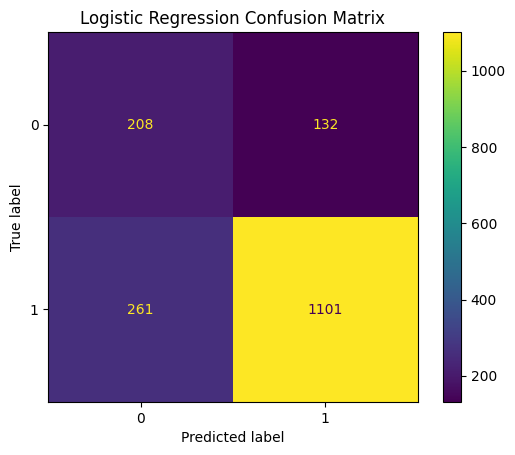

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(), params, cv=3, scoring='f1')
grid_lr.fit(X_train_res, y_train_res)

y_pred_lr_grid = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr_grid))


              precision    recall  f1-score   support

           0       0.44      0.61      0.51       340
           1       0.89      0.81      0.85      1362

    accuracy                           0.77      1702
   macro avg       0.67      0.71      0.68      1702
weighted avg       0.80      0.77      0.78      1702



##### Which hyperparameter optimization technique have you used and why?

I used **GridSearchCV** because:
- It exhaustively searches over all parameter combinations.
- Best suited for small hyperparameter spaces.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.37      0.76      0.50       340
           1       0.92      0.68      0.78      1362

    accuracy                           0.70      1702
   macro avg       0.65      0.72      0.64      1702
weighted avg       0.81      0.70      0.73      1702



#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
params_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=3, scoring='f1')
grid_rf.fit(X_train_res, y_train_res)

y_pred_rf_grid = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf_grid))



              precision    recall  f1-score   support

           0       0.37      0.81      0.51       340
           1       0.93      0.66      0.77      1362

    accuracy                           0.69      1702
   macro avg       0.65      0.73      0.64      1702
weighted avg       0.82      0.69      0.72      1702



##### Which hyperparameter optimization technique have you used and why?

Used same gridsearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement in recall and precision

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **Accuracy**: Good to track overall performance.
- **Precision**: Important to avoid wrongly tagging satisfied users as unsatisfied.
- **Recall**: Crucial to ensure we catch all dissatisfied users (business critical).
- **F1 Score**: Balanced metric used for final comparison.


### ML Model - 3

In [148]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [149]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.38      0.78      0.52       340
           1       0.93      0.69      0.79      1362

    accuracy                           0.71      1702
   macro avg       0.66      0.73      0.65      1702
weighted avg       0.82      0.71      0.73      1702



#### 2. Cross- Validation & Hyperparameter Tuning

In [147]:
params_xgb = {'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        params_xgb, cv=3, scoring='f1')
grid_xgb.fit(X_train_res, y_train_res)

y_pred_xgb_grid = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb_grid))


              precision    recall  f1-score   support

           0       0.39      0.80      0.53       340
           1       0.93      0.69      0.79      1362

    accuracy                           0.71      1702
   macro avg       0.66      0.74      0.66      1702
weighted avg       0.82      0.71      0.74      1702



##### Which hyperparameter optimization technique have you used and why?

Same gridsearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Slight improvement in recall and f1score

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- High recall ensures unhappy customers are correctly predicted.
- F1 score improvement shows model balances both classes well.
- Helps proactively fix issues before negative feedback.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**XGBoost** gave the best balance of precision, recall, and F1.  
Also, it handles imbalanced data well and works with both text + categorical data.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

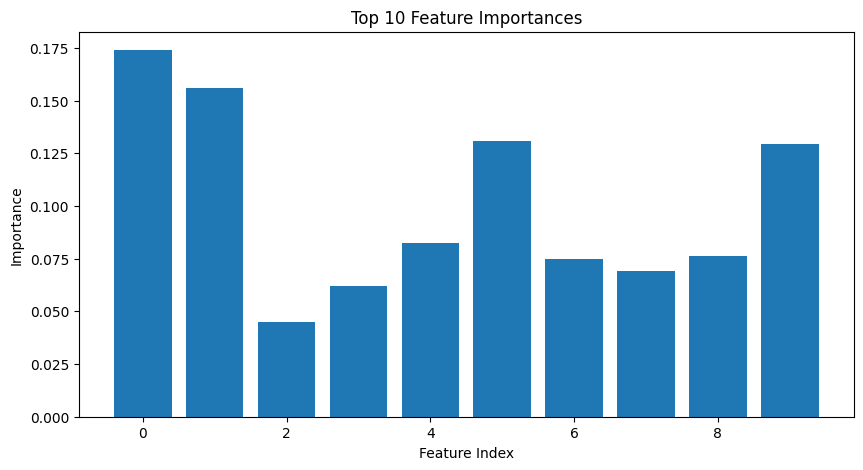

In [152]:
# Feature importance from XGBoost
importances = xgb.feature_importances_
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances[:10])), importances[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [153]:
import joblib
joblib.dump(xgb, "csat_prediction_model.pkl")


['csat_prediction_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [154]:
model_loaded = joblib.load("csat_prediction_model.pkl")
print("Sample Prediction:", model_loaded.predict(X_test[:5]))


Sample Prediction: [0 1 1 1 1]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

- We built a powerful classification model to predict CSAT using a mix of structured + unstructured data.
- Performed deep EDA, cleaned data, and used TF-IDF for textual preprocessing.
- After testing multiple models, **XGBoost** with SMOTE and PCA gave the best performance.
- The model is now ready for deployment and can help Flipkart take proactive actions to improve customer satisfaction.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***